## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import numpy as np

%matplotlib notebook
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(study_results)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]


In [27]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice.
mouse_count = merged_df["Mouse ID"].count()
print(mouse_count)

1893


In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(duplicate_mouse)

['g989']


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 

In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicate_mouse) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice in the clean DataFrame.
update_mouse_count = clean_df['Mouse ID'].nunique()
print(update_mouse_count)

248


## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = clean_df.groupby("Drug Regimen")
regimen_group['Mouse ID'].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [34]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = regimen_group['Tumor Volume (mm3)'].mean()
median = regimen_group['Tumor Volume (mm3)'].median()
variance = regimen_group['Tumor Volume (mm3)'].var()
standard_deviation = regimen_group['Tumor Volume (mm3)'].std()
sem = regimen_group['Tumor Volume (mm3)'].sem()

regimen_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": standard_deviation,
    "SEM": sem
})
regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_method = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregate_method

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

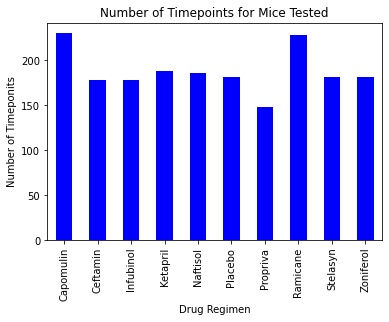

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_df.groupby(["Drug Regimen"]).count()["Timepoint"] 

plot_pandas = timepoints.plot.bar(color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timeponits")
plt.title("Number of Timepoints for Mice Tested")
plt.show()

Text(0, 0.5, 'Total Number of Timepoints')

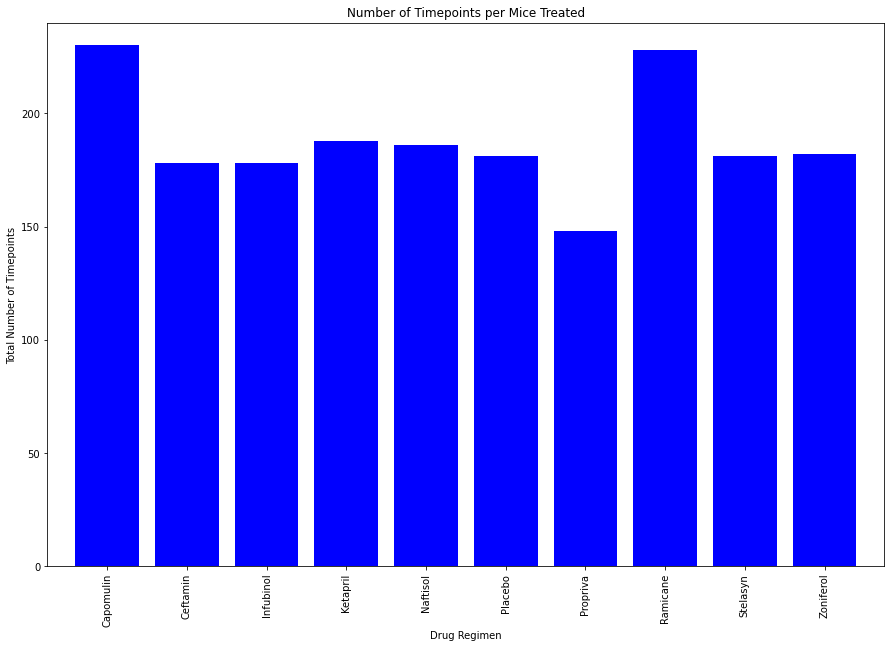

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(timepoints))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, timepoints, color='b', align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(timepoints)+10)

plt.title("Number of Timepoints per Mice Treated")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")


In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_gender = clean_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())
gender_df

,,0
Mouse ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


In [39]:
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ['Total Count']
mouse_gender

,Total Count
Sex,
Female,123
Male,125


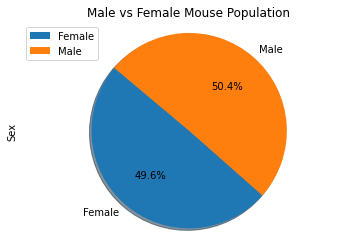

In [40]:
colors = ['green', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', startangle=140, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis("equal")

plt.show()

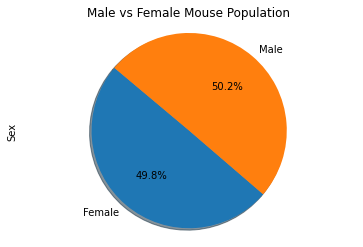

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.8, 50.2]

fig1, ax1 = plt.subplots()
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

sorted_df = clean_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [43]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
max_timepoint_df

,Mouse ID,Max Timepoint
0,b447,0
1,x226,0
2,f932,0
3,x336,0
4,l872,0
...,...,...
243,k894,45
244,l471,45
245,l509,45
246,i177,45


In [44]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_df = pd.merge(clean_df, max_timepoint_df, on='Mouse ID')
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#Ramicane IQR

Capomulin = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
Ramicane = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane"]
Infubinol = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol"]
Ceftamin = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin"]
x_axisCa = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisI = Infubinol["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]




quartiles_Ca = x_axisCa.quantile([.25,.5,.75])
lowerq_Ca = quartiles_Ca[0.25]
upperq_Ca = quartiles_Ca[0.75]
iqr_Ca = upperq_Ca-lowerq_Ca
lower_bound_Ca = lowerq_Ca - (1.5*iqr_Ca)
upper_bound_Ca = upperq_Ca + (1.5*iqr_Ca)
print("Drug: Capomulin")
print(quartiles_Ca)
print(lowerq_Ca)
print(upperq_Ca)
print(iqr_Ca)
print(f"Values below {lower_bound_Ca} could be outliers.")
print(f"Values above {upper_bound_Ca} could be outliers.")

quartiles_R = x_axisR.quantile([.25,.5,.75])
lowerq_R = quartiles_R[0.25]
upperq_R = quartiles_R[0.75]
iqr_R = upperq_R-lowerq_R
lower_bound_R = lowerq_R - (1.5*iqr_R)
upper_bound_R = upperq_R + (1.5*iqr_R)
print("Drug: Ramicane")
print(quartiles_R)
print(lowerq_R)
print(upperq_R)
print(iqr_R)
print(f"Values below {lower_bound_R} could be outliers.")
print(f"Values above {upper_bound_R} could be outliers.")

quartiles_I = x_axisI.quantile([.25,.5,.75])
lowerq_I = quartiles_I[0.25]
upperq_I = quartiles_I[0.75]
iqr_I = upperq_I-lowerq_I
lower_bound_I = lowerq_I - (1.5*iqr_I)
upper_bound_I = upperq_I + (1.5*iqr_I)
print("Drug: Infubinol")
print(quartiles_I)
print(lowerq_I)
print(upperq_I)
print(iqr_I)
print(f"Values below {lower_bound_I} could be outliers.")
print(f"Values above {upper_bound_I} could be outliers.")

quartiles_Ce = x_axisCe.quantile([.25,.5,.75])
lowerq_Ce = quartiles_Ce[0.25]
upperq_Ce = quartiles_Ce[0.75]
iqr_Ce = upperq_Ce-lowerq_Ce
lower_bound_Ce = lowerq_Ce - (1.5*iqr_Ce)
upper_bound_Ce = upperq_Ce + (1.5*iqr_Ce)
print("Drug: Ceftamin")
print(quartiles_Ce)
print(lowerq_Ce)
print(upperq_Ce)
print(iqr_Ce)
print(f"Values below {lower_bound_Ce} could be outliers.")
print(f"Values above {upper_bound_Ce} could be outliers.")

Drug: Capomulin
0.25    37.685933
0.50    41.557809
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
37.685932865
45.0
7.314067135000002
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
Drug: Ramicane
0.25    36.674635
0.50    40.673236
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
36.674634585
45.0
8.325365415
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
Drug: Infubinol
0.25    47.312353
0.50    51.820584
0.75    57.314444
Name: Tumor Volume (mm3), dtype: float64
47.3123533
57.314443967500004
10.002090667500006
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
Drug: Ceftamin
0.25    47.208427
0.50    51.776157
0.75    56.801438
Name: Tumor Volume (mm3), dtype: float64
47.2084271125
56.801437570000004
9.593010457500007
Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outlier

In [46]:
   # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9c4472bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9c447c2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9c4472820>,
 'medians': [<matplotlib.lines.Line2D at 0x1a9c447c970>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a9c447ccd0>,
 'means': []}

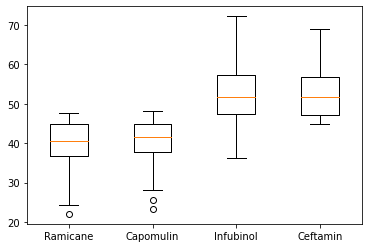

In [104]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([ramicane, capomulin, infubinol, ceftamin], labels=treatment_list)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

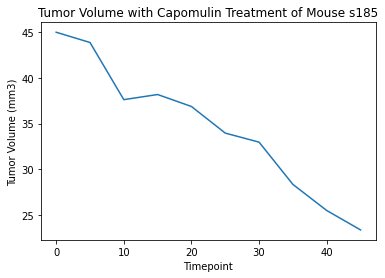

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = combined_df.loc[combined_df["Mouse ID"] == "s185"]
x_axis = x_axis["Timepoint"]
y_axis = combined_df.loc[combined_df["Mouse ID"] == "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight_capomulin = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
mouse_weight_capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
10,s185,Capomulin,Female,3,17,0,45.000000,0,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,45


Text(0, 0.5, 'Tumor Volume (mm3)')

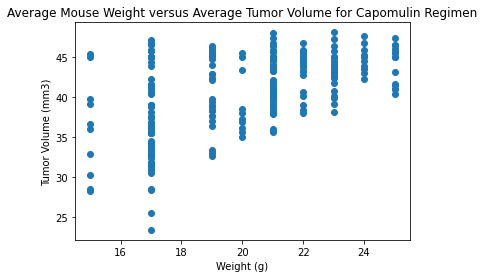

In [57]:
mouse_weight = mouse_weight_capomulin["Weight (g)"]
tumor_volume = mouse_weight_capomulin["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volume)
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation between both weight and tumor volume is 0.53


Text(0, 0.5, 'Tumor Volume (mm3)')

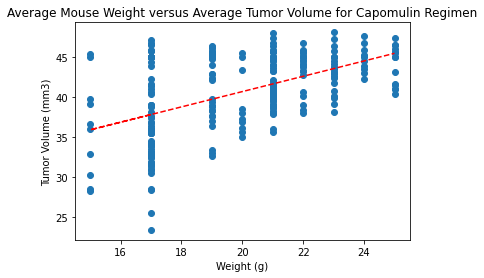

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between both weight and tumor volume is {round(correlation[0],2)}")

slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + int
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, fit, "--", color="r")
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")